<h1 align=center style="background-color:rgb(220,220,220);">
    <font face = "Veranda" size = "5"><b>Regression Models with Keras</b></font></br>
        <font face = "sans-serif" size = "2"> <a href="https://www.linkedin.com/in/suman-saurabh-10155b198/"><b>Suman Saurabh </b>:<em><u>Linkedin</u> Profile</em></a></font>
</h1>
<div align=center style="background-color:rgb(0,0,0);" style="margin-top: 0px">
  <img display:block vertical-align:bottom src = "https://c0.wallpaperflare.com/preview/729/37/117/advanced-ai-anatomy-artificial.jpg" width = "auto" height="50">
</div>
 

<h2 style="paddingTop:0px;" align="center"><font color="blue">SUMMARY</font></h2>

This notebook is a Neural Network (machine learning) project on a set of data on various concrete properties that are can be used as a feature to predict concrete strength. I will use Keras and scikit learn libraries in this project to develop, build, compile and run a neural network that can reliably predict concrete strength using avaliable features. 

<h3 align="center"><font color="DarkRed"><u>Part - A</u></font></h3>

#### Part B was done before Part A, hence I could use the model developed in Part B in Part A. Please start reading the notebook from Part B

In [38]:
cd.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Splitting data into predictor and target 

In [39]:
cd_col = cd.columns
predictor = cd[cd_col[0:8]]
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [40]:
target = cd[cd.columns[8]]
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [44]:
n_x = predictor.shape[1] # number of predictors
print(n_x)

8


Splitting data into train and test set using sklearn train_test_split 

In [45]:
from sklearn.model_selection import train_test_split
XA = predictor
yA = target
X_trainA, X_testA, y_trainA, y_testA = train_test_split(XA, yA, test_size=0.30, random_state = 1)
X_trainA.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
185,222.4,0.0,96.7,189.3,4.5,967.1,870.3,14
286,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,28
600,339.0,0.0,0.0,197.0,0.0,968.0,781.0,14
691,212.0,141.3,0.0,203.5,0.0,973.4,750.0,3
474,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28


#### Calling model built in Part B and fitting it over training data and evaluating it on test data; MSE(Mean squared error) over 50 iterations are recorded and mean and standard deviation of the list is estimated

In [46]:
mse_listA = []
for i in range(1,51):
    model.fit(X_trainA, y_trainA, epochs=50, verbose=0)
    loss_testA = model.evaluate(x=X_testA, y=y_testA, verbose=1)
    mse_listA.append(loss_testA)

309/309 [==============================] - 0s 127us/step


In [47]:
print(mse_listA)

[917795.7596076052, 331594.09900889965, 114058.08100728155, 32824.491568062294, 7541.60882509102, 1986.4872343686793, 974.727781425402, 541.8979283305048, 358.5847238583858, 312.90117262559414, 255.62342533247372, 242.1172912992706, 226.17618928680915, 230.09587245311553, 197.56892908583953, 190.658967052077, 219.85030720534834, 178.5247504225055, 235.94854104248836, 174.0953034829939, 180.5102380795772, 168.31352530173885, 166.5584760746138, 176.13846943679366, 169.40873510860703, 167.75539968546155, 161.12402761021093, 165.5148907757114, 162.84020781285554, 174.48532124244664, 156.70729669861038, 280.7610538815989, 157.86241226443195, 152.30023526682436, 176.78925251883595, 149.8819948955647, 157.6088122272183, 161.0680553349862, 149.79556906493352, 146.77863412999028, 180.8795271938287, 153.20374278343226, 145.12196994522242, 143.11664420809947, 141.34373582759721, 157.9497402401032, 172.39269078819498, 147.2791413736189, 158.76688417107542, 155.31968970437651]


In [54]:
import statistics
mean_mseA = statistics.mean(mse_listA)
std_mseA = statistics.stdev(mse_listA)
print("mean squared error is:"+ str(mean_mseA) +"standard deviation of the mean squared error is:"+str(std_mseA))

mean squared error is:28301.537496157154standard deviation of the mean squared error is:137499.91738769494


<h3 align=center><font color="purple" face="monospace" >It can be seen that the loss value or mse (mean squared error) is very high for not normalized case</font></h3>

<h3 align="center"><font color="DarkRed"><u>Part - B</u></font></h3>

This notebook is a Neural Network (machine learning) project on a set of data on various concrete properties that are can be used as a feature to predict concrete strength. I will use Keras and scikit learn libraries in this project to develop, build, compile and run a neural network that can reliably predict concrete strength using avaliable features. 

I will start by importing the important libraries that we will/may need during our analyses.

In [2]:
import pandas as pd # pandas for dataframe analysis
import numpy as np #for basic maths functions we will use
import seaborn as sns #for regplots to see the realtion between various variables and the strength of concrete
import matplotlib.pyplot as plt # to plot graphs
import sklearn #for some machine learning project
import keras # for the neural network developement
print("Libraries imported!")

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Libraries imported!


<em>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</em>

<strong style="margin-top:0px">1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

<font size= "2" color="blue">Downloading the data and read it into a <em>pandas</em> dataframe.</font>

In [4]:
cd = pd.read_csv('https://cocl.us/concrete_data')
cd.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Lets see the shape of the dataframe and the number of examples we have

In [5]:
cd.shape

(1030, 9)

#### Lets see a brief statistical description of the data provided

In [7]:
cd.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Lets use seaborn now to plot regression between each variable to see how strong of an effect each variable has on strength

<p> We have 9 columns in the dataframe read. Out of which we want to use the first eight from <em> Cement:Age </em> as our features in the neural network and <em>Strength</em> as the target</p>

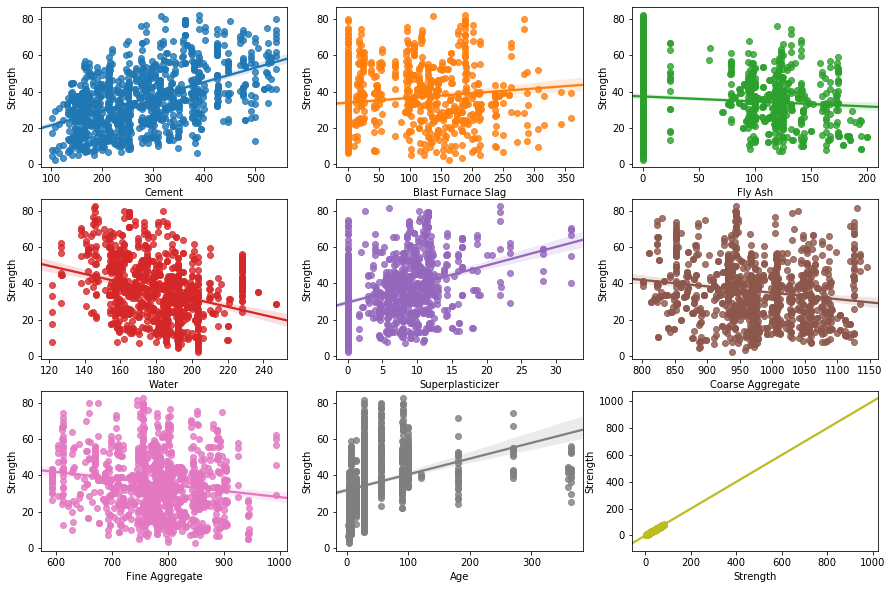

In [8]:
f, axes = plt.subplots(3,3, figsize = (15,10), sharex = False, sharey =False, squeeze = True)
sns.regplot(x = 'Cement', y = 'Strength', data = cd,ax=axes[0,0])
sns.regplot(x = 'Blast Furnace Slag', y = 'Strength', data = cd,ax=axes[0,1])
sns.regplot(x = 'Fly Ash', y = 'Strength', data = cd, ax=axes[0,2])
sns.regplot(x = 'Water', y = 'Strength', data = cd,ax=axes[1,0])
sns.regplot(x = 'Superplasticizer', y = 'Strength', data = cd,ax=axes[1,1])
sns.regplot(x = 'Coarse Aggregate', y = 'Strength', data = cd,ax=axes[1,2])
sns.regplot(x = 'Fine Aggregate', y = 'Strength', data = cd,ax=axes[2,0])
sns.regplot(x = 'Age', y = 'Strength', data = cd,ax=axes[2,1])
sns.regplot(x = 'Strength', y = 'Strength', data = cd,ax=axes[2,2])

#### Checking for missing values

In [10]:
cd.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### No missing values found, hence we continue to feature extraction and setting target variable

In [13]:
cd_col = cd.columns
predictor = cd[cd_col[0:8]]
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
target = cd[cd.columns[8]]
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

#### Normalize the data by substracting the mean and dividing by the standard deviation.

In [15]:
predictors_norm = (predictor - predictor.mean()) / predictor.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


#### Lets use sklearn library for the purpose of splitting training train and test data in the ratio of 0.7:0.3 in random state.

Let's save the number of predictors to *n_x* since we will need this number when building our network.

In [16]:
n_x = predictors_norm.shape[1] # number of predictors
print(n_x)

8


In [17]:
from sklearn.model_selection import train_test_split
X = predictors_norm
y= target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
185,-0.562338,-0.856472,0.664276,0.362117,-0.285354,-0.074838,1.206340,-0.501222
286,-0.954658,-0.856472,1.762765,-0.560418,0.233575,1.063368,0.052628,-0.279597
600,0.553384,-0.856472,-0.846733,0.722701,-1.038638,-0.063263,0.092540,-0.501222
691,-0.661853,0.781232,-0.846733,1.027091,-1.038638,0.006187,-0.294109,-0.675355
474,1.577245,-0.578306,0.387700,-0.916319,0.685545,-0.076124,-0.768067,-0.279597


In [18]:
X_train.shape

(721, 8)

In [19]:
X_test.shape

(309, 8)

In [20]:
print(y_train.shape, y_test.shape)

(721,) (309,)


<h2 align= center><font color="DarkRed" face="veranda"> <b> Building the neural network (NN) model </b> </font></h2>

#### Importing model and layers for defining NN architecture

In [21]:
from keras.models import Sequential
from keras.layers import Dense

Defining a function that defines our regression model for us so that we can conveniently call it to create our model.

In [22]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_x,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has a hidden layers of size 10 units and *relu* as the activation function. 

#### Train and Test the Network

Let's call the function now to create our model.

In [23]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 50 epochs.

In [24]:
# fit the model
history=model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
721/721 [==============================] - 1s 725us/step - loss: 1509.6458
Epoch 2/50
721/721 [==============================] - 0s 334us/step - loss: 1492.9493
Epoch 3/50
721/721 [==============================] - 0s 282us/step - loss: 1475.7167
Epoch 4/50
721/721 [==============================] - 0s 329us/step - loss: 1457.4276
Epoch 5/50
721/721 [==============================] - 0s 362us/step - loss: 1437.86260s - loss: 143
Epoch 6/50
721/721 [==============================] - 0s 389us/step - loss: 1417.4735
Epoch 7/50
721/721 [==============================] - 0s 362us/step - loss: 1395.8618
Epoch 8/50
721/721 [==============================] - 0s 333us/step - loss: 1372.9458
Epoch 9/50
721/721 [==============================] - 0s 305us/step - loss: 1348.7692
Epoch 10/50
721/721 [==============================] - 0s 309us/step - loss: 1323.4142
Epoch 11/50
721/721 [==============================] - 0s 272us/step - loss: 1296.8124
Epoch 12/50
721/721 [=================

#### lets find out the final value of loss = "mean squared error" in our model

In [25]:
loss_list = history.history['loss']
print(loss_list[49])

259.02914602250564


#### Lets also plot the graph of loss vs the epochs to see if the loss function continuously went down, which is a good sign of NN working good

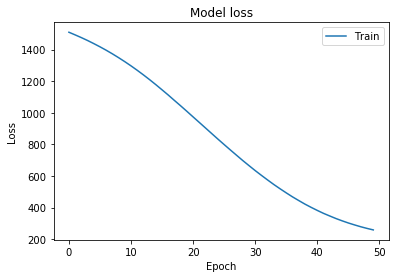

In [26]:

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [27]:
loss_test = model.evaluate(x=X_test, y=y_test, verbose=1)

309/309 [==============================] - 0s 255us/step


In [28]:
print(loss_test)

292.62543712233264


#### It can be seen that though the loss went down continuously but it never reached close to a steady state value. Hence, we can do better. 

### Running the process 50 times and creating a list of 'mse-mean squared error' for each run. 

In [29]:
mse_list = []
for i in range(1,51):
    model.fit(X_train, y_train, epochs=50, verbose=0)
    loss_test = model.evaluate(x=X_test, y=y_test, verbose=1)
    mse_list.append(loss_test)

309/309 [==============================] - 0s 128us/step


In [30]:
print(mse_list)

[181.57285266863875, 141.40651828802905, 112.62714435367522, 88.63917827914834, 74.21157207303834, 65.65647769668728, 61.29416250333817, 59.16809367207647, 57.378848893742735, 56.154050265315284, 54.58116615320101, 53.6368645356311, 52.91205994442443, 52.24101693113259, 51.667204736505894, 51.25176480981524, 50.831682828637774, 50.50146179446125, 50.108638763427734, 49.41708712284619, 48.91705470409208, 48.787237371055824, 48.17923371151427, 47.926073845921984, 47.73821678285074, 47.42507928397663, 47.34648934768627, 47.241888459832154, 46.94144649567342, 46.89454918771886, 46.64600421695648, 46.414283431463645, 46.12996669880395, 46.1116522384693, 45.736554229143756, 45.464787850487966, 45.54432604150865, 45.362044646130414, 45.17955372634443, 45.17948413589626, 44.98167926825366, 44.98980656102251, 44.60199259785772, 44.49836381585081, 44.44856481953346, 44.23357177783756, 44.12604670848661, 44.083350764894945, 44.044421174379615, 44.09890972989277]


#### finding out the mean and standard deviation of the values in mse_list

In [37]:
import statistics
mean_mse = statistics.mean(mse_list)
std_mse = statistics.stdev(mse_list)
print("mean squared error is:"+ str(mean_mse) +"standard deviation of the mean squared error is:"+str(std_mse))

mean squared error is:55.89060959874619standard deviation of the mean squared error is:25.187203454833156


<h3 align="center"><font color="DarkRed"><u>Part - C</u></font></h3>

Repeating Part B with epochs = 100

In [58]:
mse_listC = []
for i in range(1,51):
    model.fit(X_train, y_train, epochs=100, verbose=0)
    loss_testC = model.evaluate(x=X_test, y=y_test, verbose=1)
    mse_listC.append(loss_testC)

309/309 [==============================] - 0s 82us/step


In [59]:
print(mse_listC)

[53.52136355156266, 53.54375889849123, 53.64690715209566, 53.619980808986426, 53.584712550092284, 53.79183899468974, 53.765437623057935, 53.679735659009815, 53.75688836798313, 53.542592193702276, 53.5877334446583, 53.72185543517079, 53.708501661479666, 53.84336017250629, 54.019141743484056, 54.29707450002528, 54.581865390913386, 54.43432708542709, 54.54186963572086, 54.85035162373268, 54.680380886040844, 54.60167944701358, 54.80283386576137, 54.83701272612637, 54.59752932798515, 54.65856784215637, 54.55735675108085, 54.653518158255274, 54.43296791743306, 54.467316649106714, 54.4334488655757, 54.23538000606796, 53.80527929657871, 53.83856727081595, 53.770732657423295, 53.61731674293098, 53.6481099298471, 53.52289551670111, 53.52045575237583, 53.32447589022442, 53.41753424487068, 53.372348069373075, 53.42947997553063, 53.49859040146121, 53.53273136175952, 53.41580034768312, 53.38019212395628, 53.04703863693287, 53.478271793007465, 53.30656203482915]


In [60]:
import statistics
mean_mseC = statistics.mean(mse_listC)
std_mseC = statistics.stdev(mse_listC)
print("mean squared error is:"+ str(mean_mseC) +"standard deviation of the mean squared error is:"+str(std_mseC))

mean squared error is:53.918473419633884standard deviation of the mean squared error is:0.5064607237468232


<h3 align="center"><font color="DarkRed"><u>Part - D</u></font></h3>

Repeating part B (i.e with 50 epochs), but with a different NN architecture, three hidden layers with 10 units each and 'relu' activation function.

In [63]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_x,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [64]:
mse_listD = []
for i in range(1,51):
    model.fit(X_train, y_train, epochs=50, verbose=0)
    loss_testD = model.evaluate(x=X_test, y=y_test, verbose=1)
    mse_listD.append(loss_testD)

309/309 [==============================] - 0s 120us/step


In [65]:
print(mse_listD)

[53.36365497922434, 53.32210962980696, 52.97881791198138, 53.42235718267249, 53.57497210950142, 53.8432248309978, 53.71096352388944, 54.08742224437133, 54.250974315655654, 54.54607420986139, 54.64173879283917, 54.77221294514184, 55.00198314876618, 54.98045670098857, 54.995562321931416, 55.05793663444643, 55.029191594293586, 55.194951079038354, 55.282750916712494, 55.27997463189283, 55.28522632191482, 55.322981257268914, 55.352908310380954, 55.45481877496713, 55.52398155730905, 55.632019438018304, 55.57776807272704, 55.60941435681192, 55.5414468215893, 55.475055188422836, 55.737143112232, 55.803556868173544, 55.57656522090381, 55.70300036186539, 55.59307505783526, 55.744797543028795, 55.671901739916756, 55.839322222860886, 55.70387813728604, 55.99921086382326, 55.89580390214149, 55.74958416096215, 55.788205267156215, 55.82085364381858, 55.78275017599458, 55.847217720303334, 55.85245239850387, 55.8925060778374, 55.91197453964875, 55.711712760061125]


In [66]:
import statistics
mean_mseD = statistics.mean(mse_listD)
std_mseD = statistics.stdev(mse_listD)
print("mean squared error is:"+ str(mean_mseD) +"standard deviation of the mean squared error is:"+str(std_mseD))

mean squared error is:55.154769231555534standard deviation of the mean squared error is:0.8171550051719635


## The result with three layers and 50 epochs is good but not as better as with one layer and 100 epochs 

###---------------------------------------------------Thank You for going through Notebook------------------------------------------------------------------------------
please contact me for any clarification on the notebook with me at my email address: sumanan047@gmail.com